In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_12DLorenz.recursive_Markovian_PostMeanScore_12DLorenz_Stable_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files(config, root_dir ):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DLnzLessData/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "MSE" in file and "bwidx" not in file:
                mses = pd.read_parquet(root_nadaraya_dir+file)
                mses["bw"] = [mses["bw"].loc[i][0] for i in mses.index]
                print(mses)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

In [4]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files(config=config, root_dir=root_dir)
len(bws)

           bw          mse
10   0.004538    67.653547
11   0.005992    74.412188
12   0.007912    82.248245
13   0.010446    95.957614
14   0.013793   133.000324
15   0.018211   236.652197
16   0.024046   478.168787
17   0.031749   881.591852
18   0.041919  1448.291571
19   0.055348  2133.718264
20   0.073079  2503.146542
21   0.096490  2235.971729
22   0.127401  1730.703876
23   0.168214  1256.224381
24   0.222102   937.022950
25   0.293252   770.024193
26   0.387196   697.403256
27   0.511235   665.645969
28   0.675010   646.940367
29   0.891251   631.221048
30   1.135011   616.609095
31   1.445440   599.368089
32   1.840772   577.685739
33   2.344229   548.582347
34   2.985383   509.939951
35   3.801894   461.266940
36   4.841724   405.716910
37   6.165950   353.772509
38   7.852356   315.955654
39  10.000000   292.966364


48

Text(0.5, 1.0, 'Minimum MSE is (0.0045383350133410445, 67.65354702455147)')

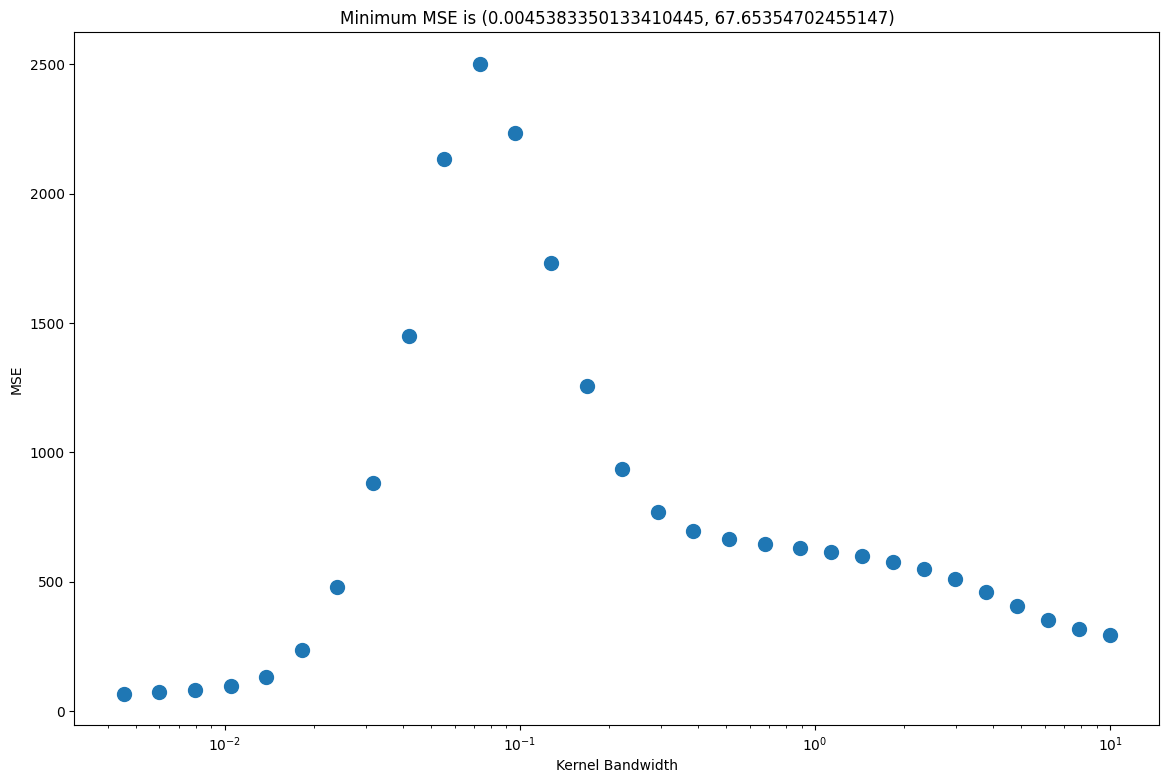

In [10]:
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 0], mses.iloc[np.argmin(mses.mse), 1]}")

12.904806894866212 0.0007912 inf


/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_31949/495716104.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_31949/495716104.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


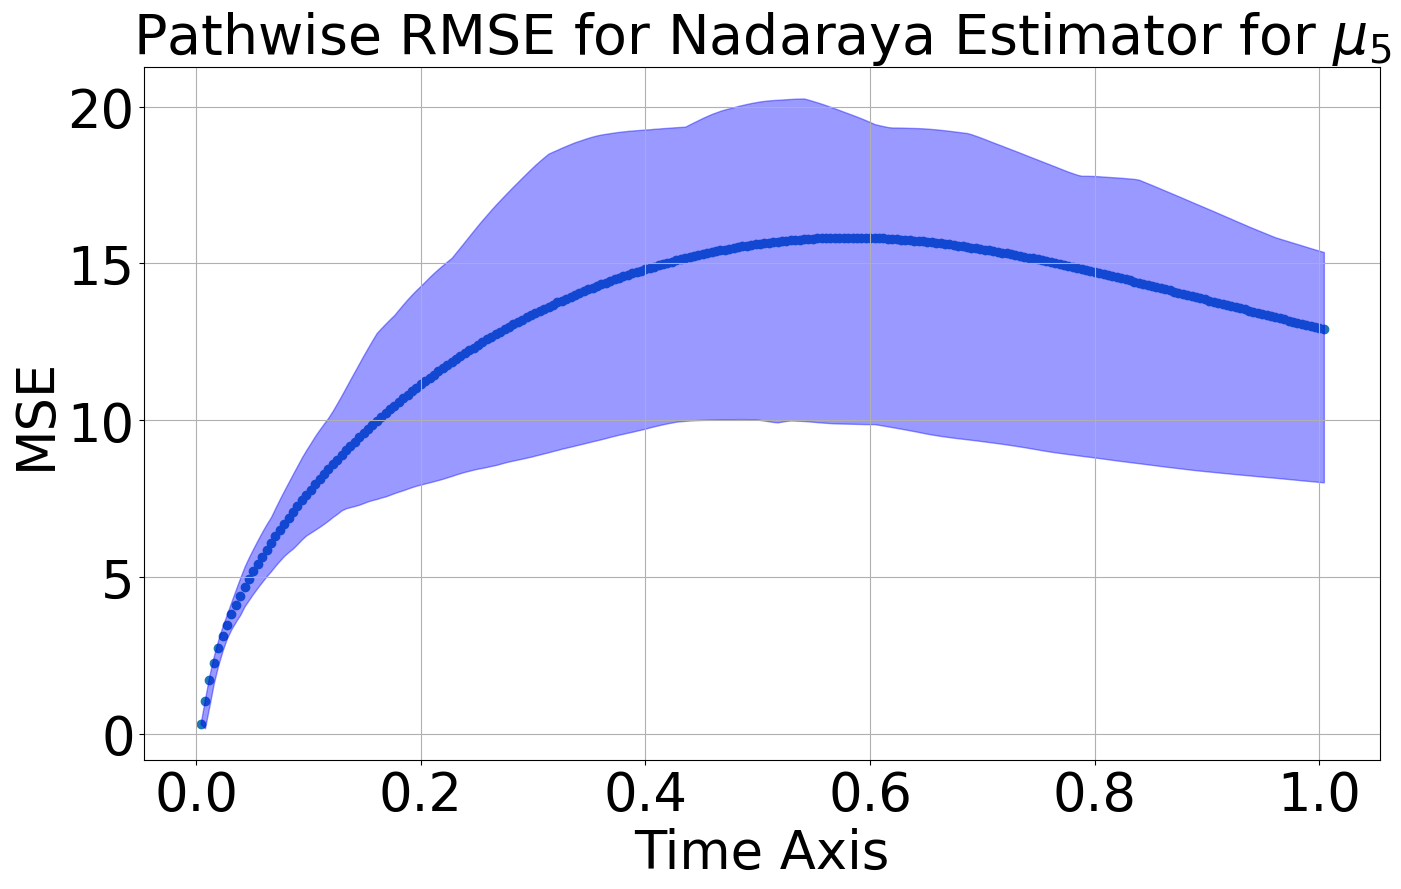

Final time cumulative MSE local-time error 12.904806894866212 with IQR ((8.020444607385429, 15.36156760828197))at bw 0.0007912 for 0.75FConst

12.901632422603095 0.0010446 12.904806894866212


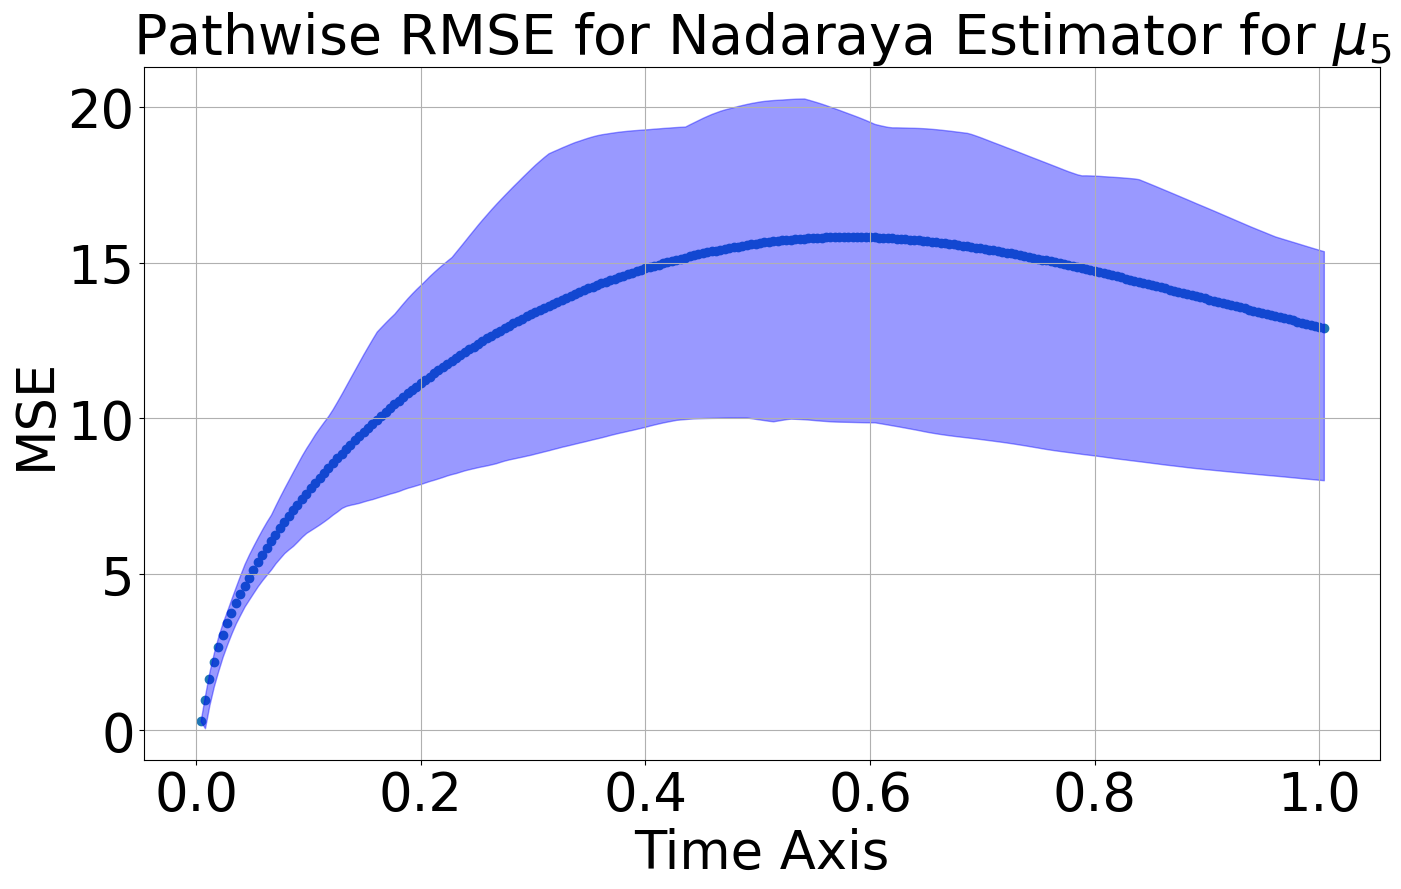

Final time cumulative MSE local-time error 12.901632422603095 with IQR ((8.020533531488482, 15.362207489468005))at bw 0.0010446 for 0.75FConst

12.883761271179592 0.0013793 12.901632422603095


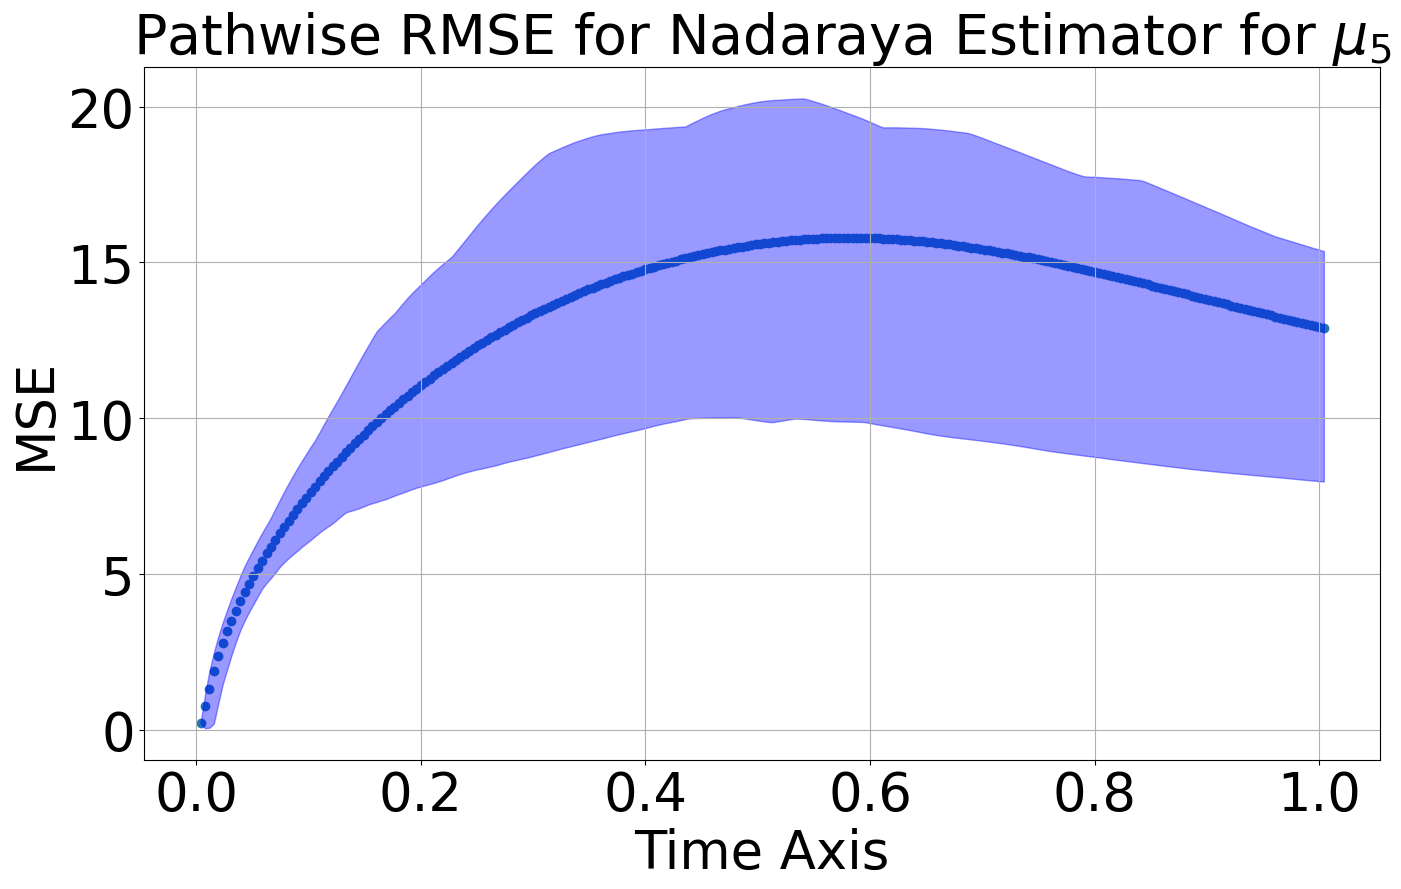

Final time cumulative MSE local-time error 12.883761271179592 with IQR ((7.966886296100661, 15.363586384292987))at bw 0.0013793 for 0.75FConst

12.851680447192646 0.0018211 12.883761271179592


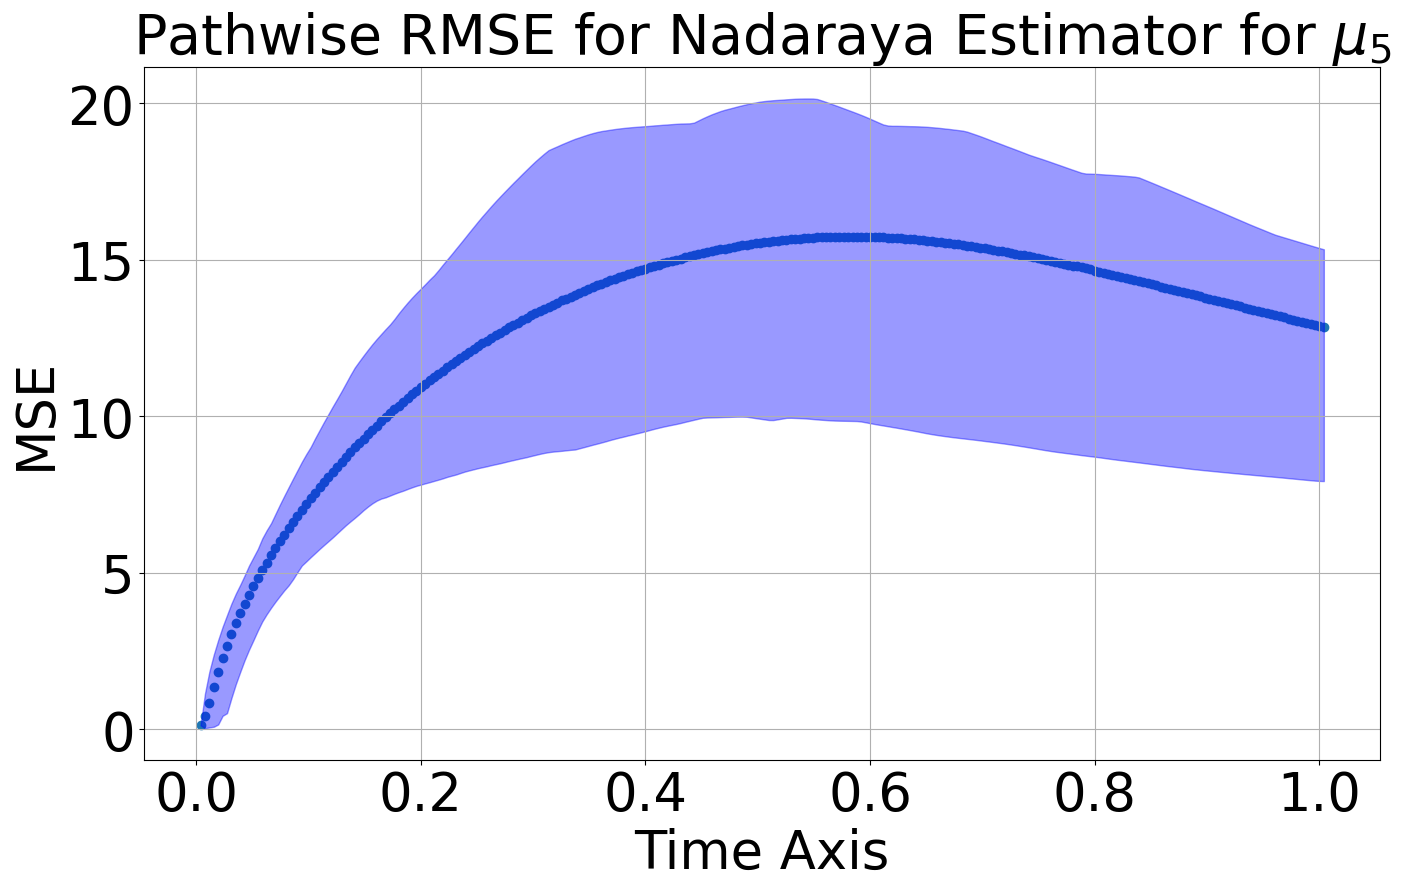

Final time cumulative MSE local-time error 12.851680447192646 with IQR ((7.927615720097976, 15.33583873016787))at bw 0.0018211 for 0.75FConst

12.793555526447992 0.0024046 12.851680447192646


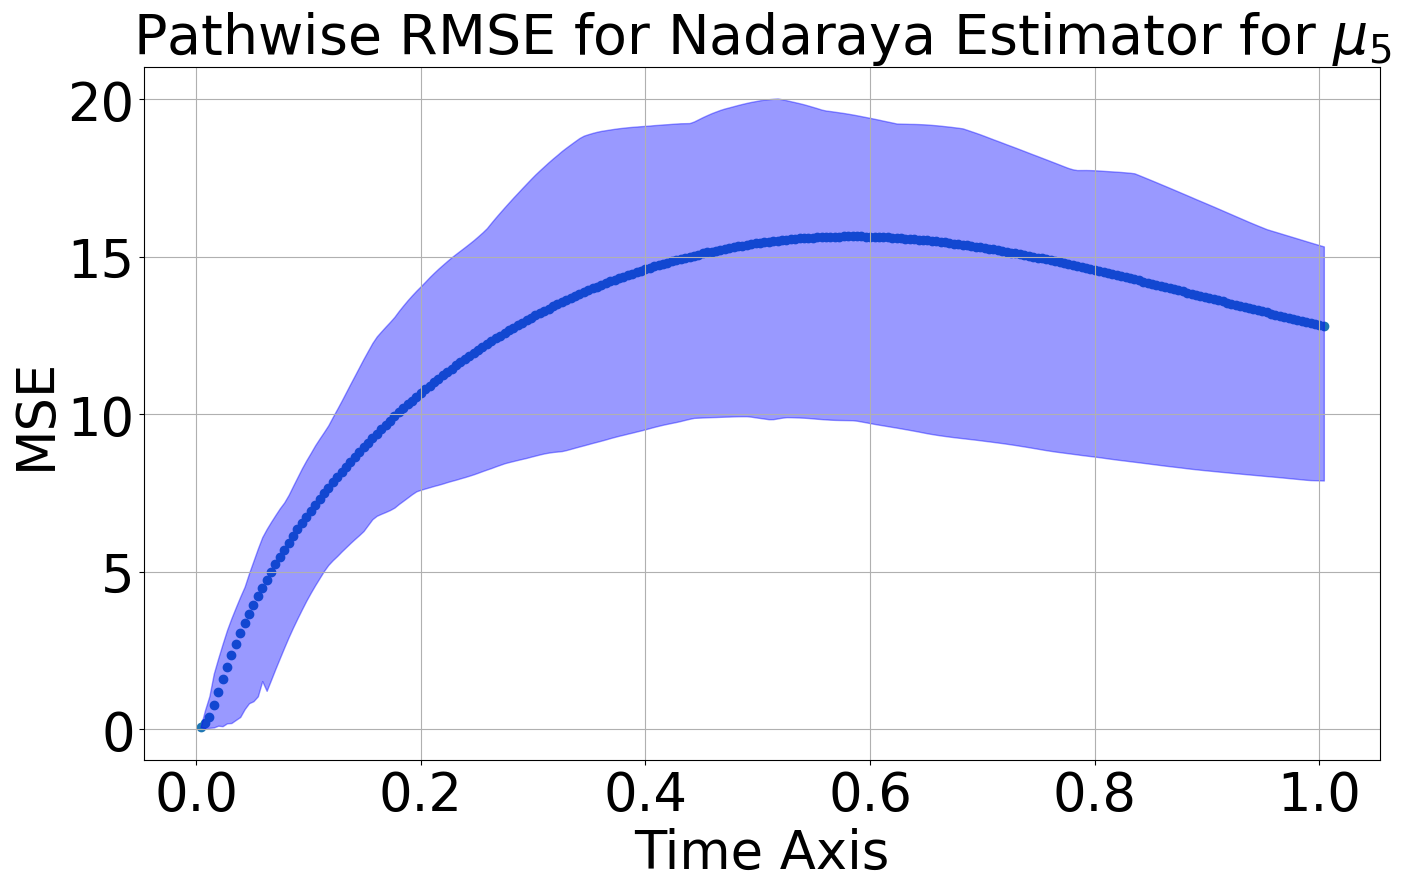

Final time cumulative MSE local-time error 12.793555526447992 with IQR ((7.8985872768266585, 15.331641165986122))at bw 0.0024046 for 0.75FConst

12.69237572672209 0.0031749 12.793555526447992


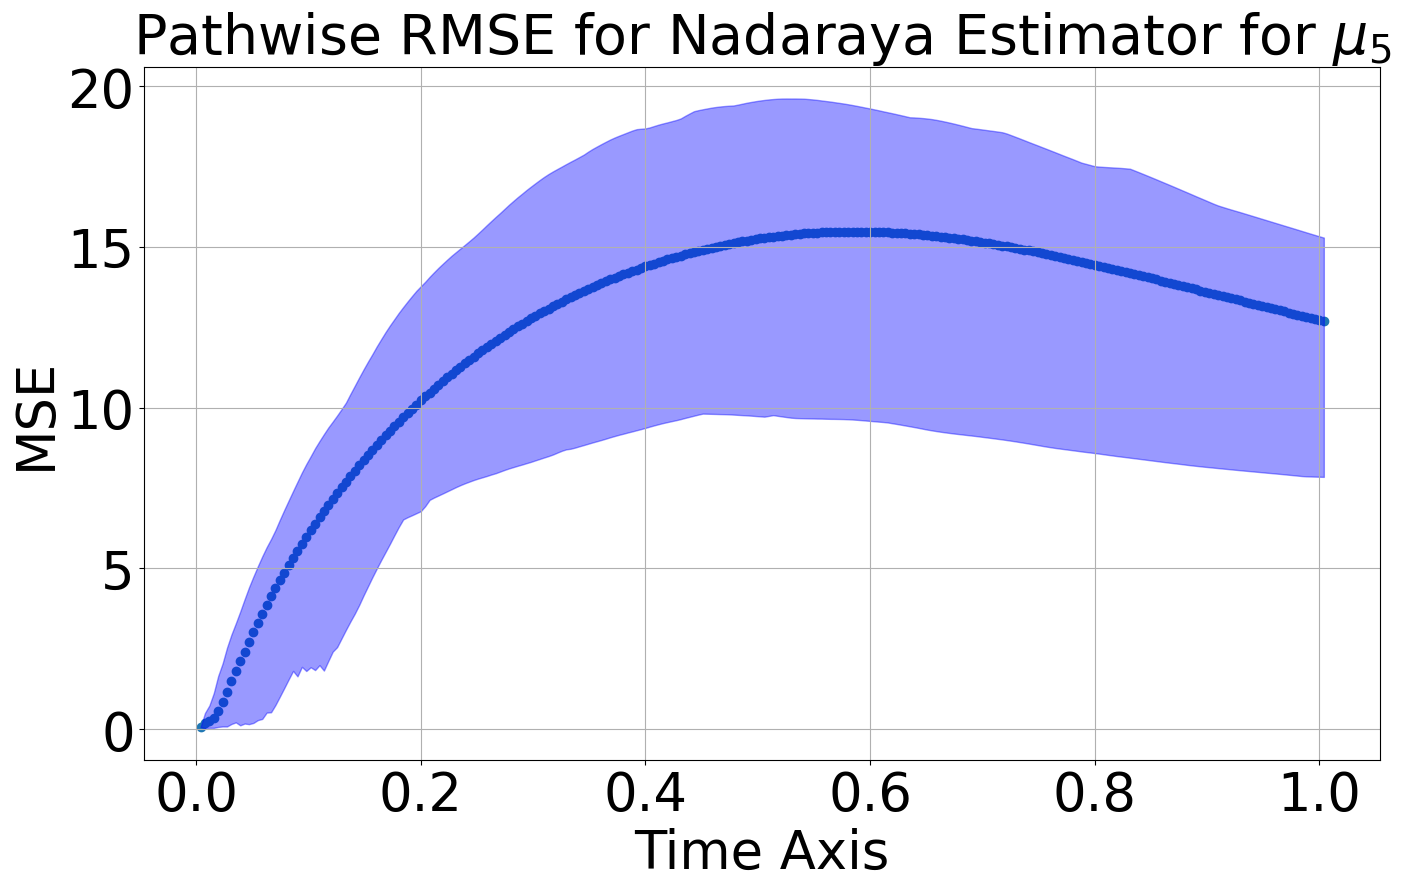

Final time cumulative MSE local-time error 12.69237572672209 with IQR ((7.847487229242611, 15.289005418127138))at bw 0.0031749 for 0.75FConst

12.4983972610669 0.0041919 12.69237572672209


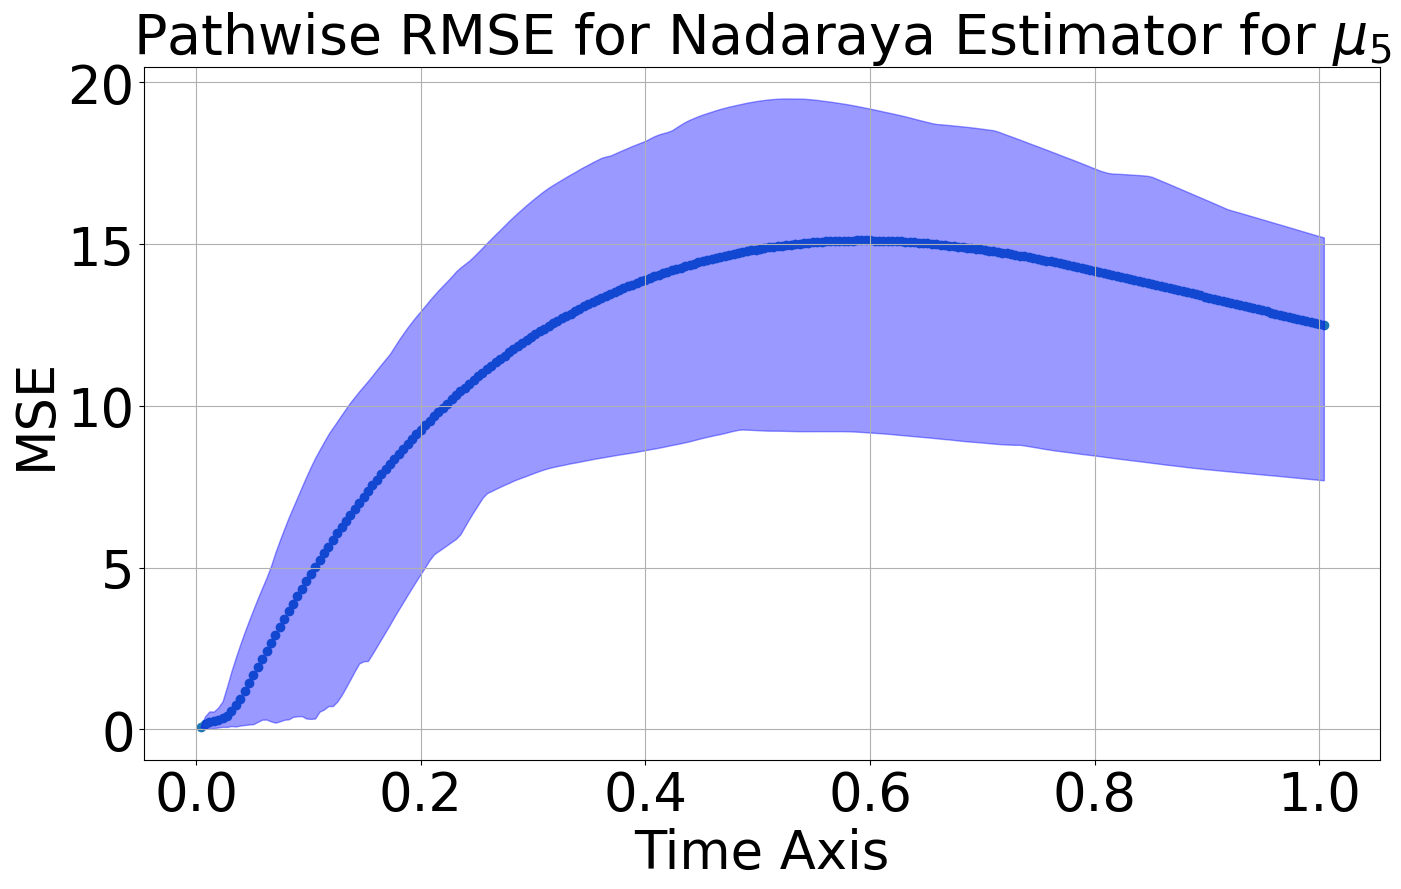

Final time cumulative MSE local-time error 12.4983972610669 with IQR ((7.699240350906965, 15.208497066435013))at bw 0.0041919 for 0.75FConst

12.173281874365523 0.0055348 12.4983972610669


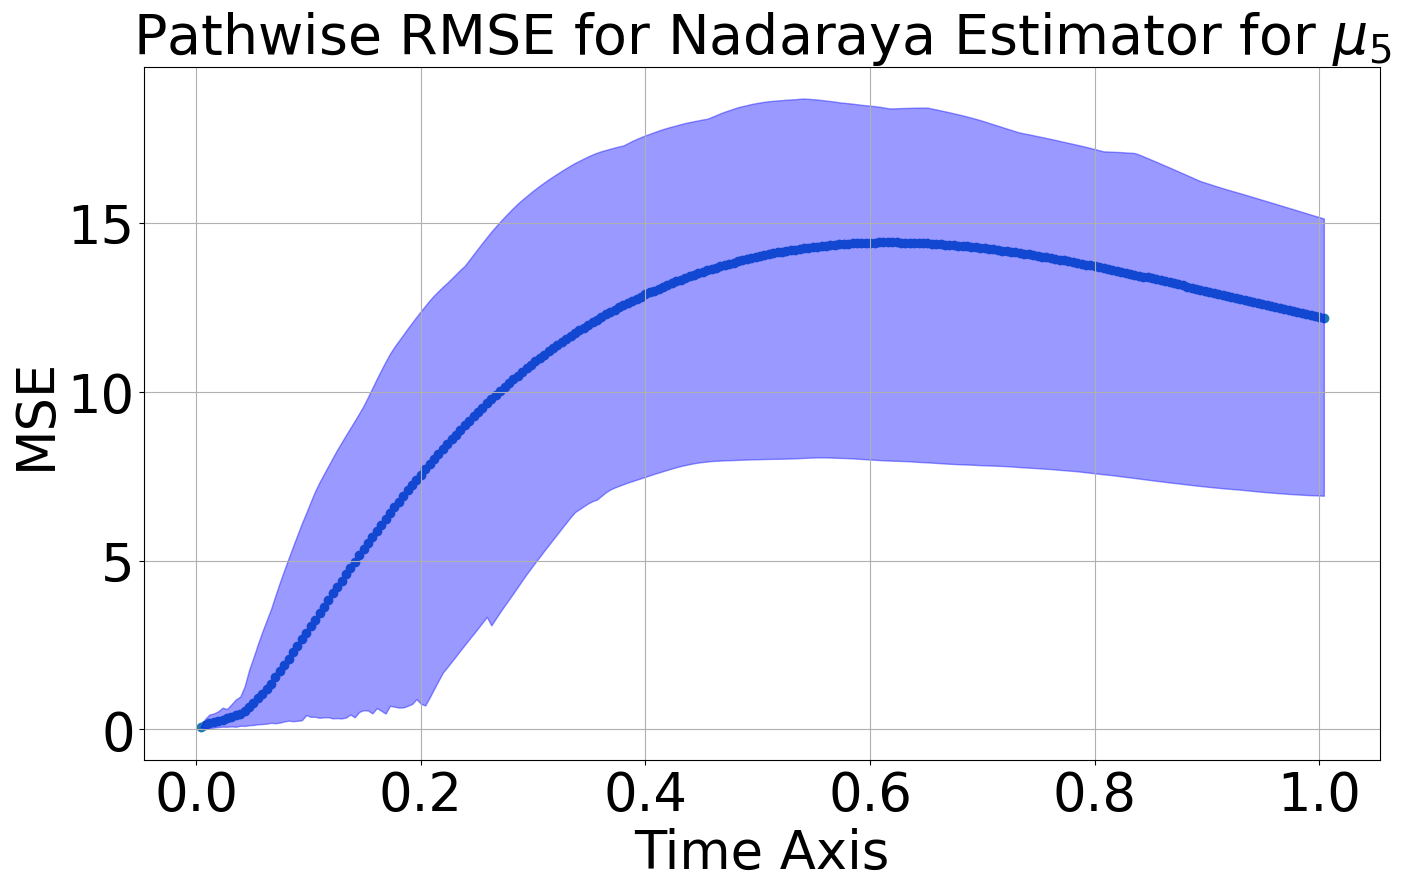

Final time cumulative MSE local-time error 12.173281874365523 with IQR ((6.918532901203792, 15.125436590968881))at bw 0.0055348 for 0.75FConst

11.545351839237236 0.0073079 12.173281874365523


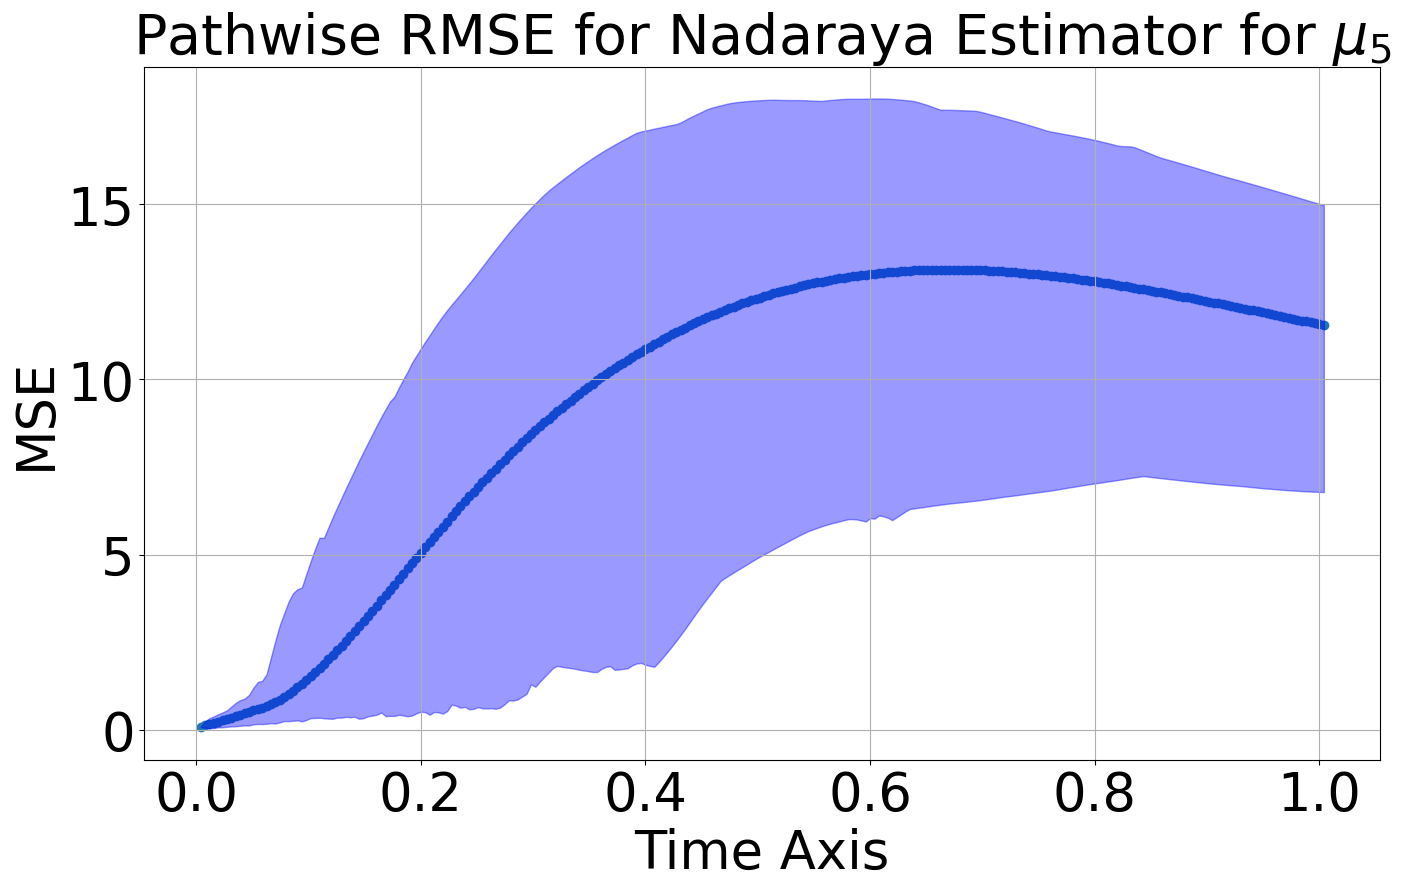

Final time cumulative MSE local-time error 11.545351839237236 with IQR ((6.783833703478857, 14.966363755422064))at bw 0.0073079 for 0.75FConst

10.117589670379942 0.009649 11.545351839237236


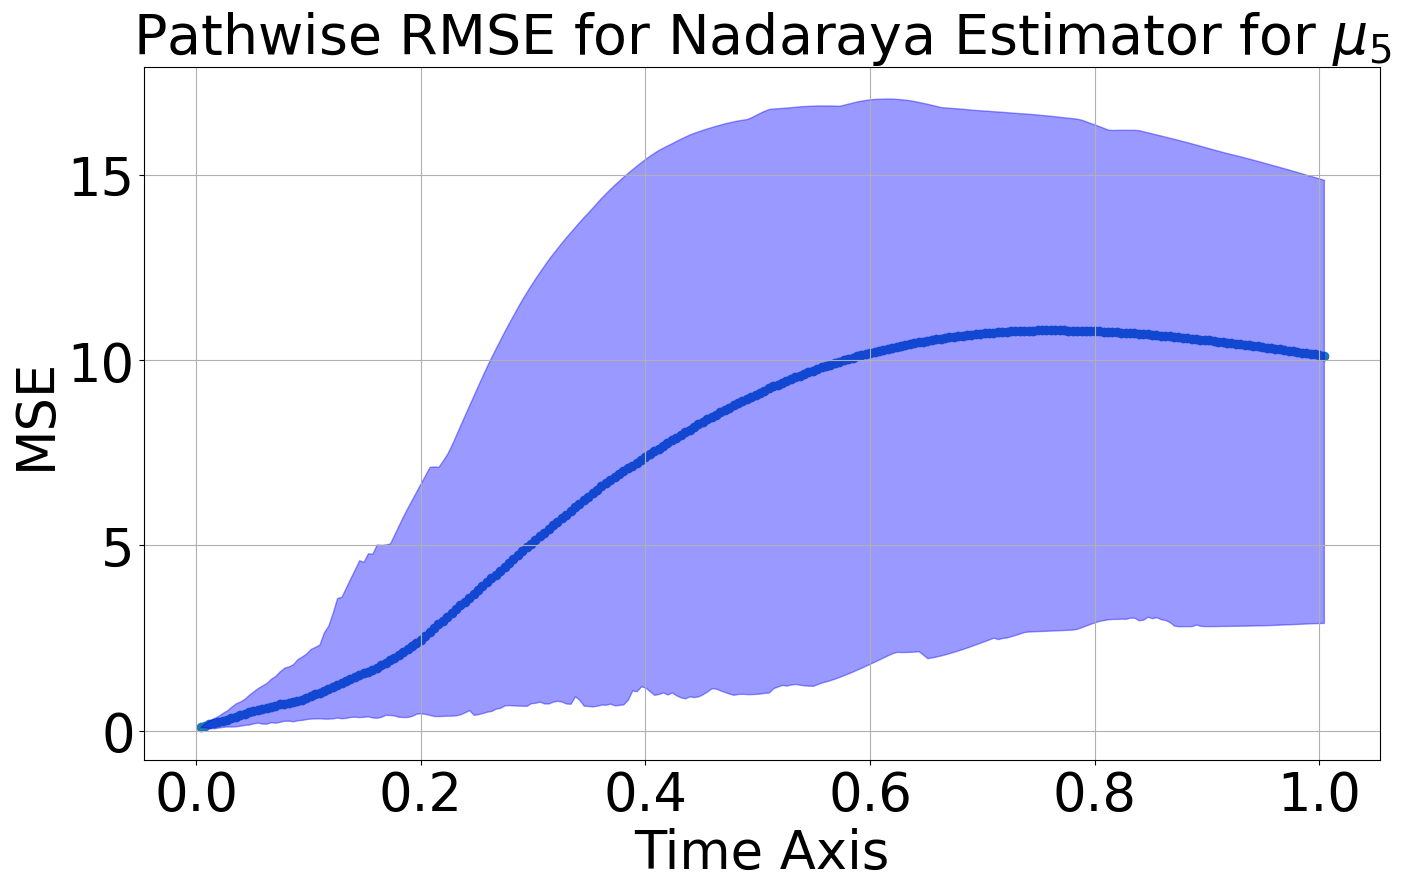

Final time cumulative MSE local-time error 10.117589670379942 with IQR ((2.908408911194554, 14.86507130370945))at bw 0.009649 for 0.75FConst

7.724437609641813 0.0127401 10.117589670379942


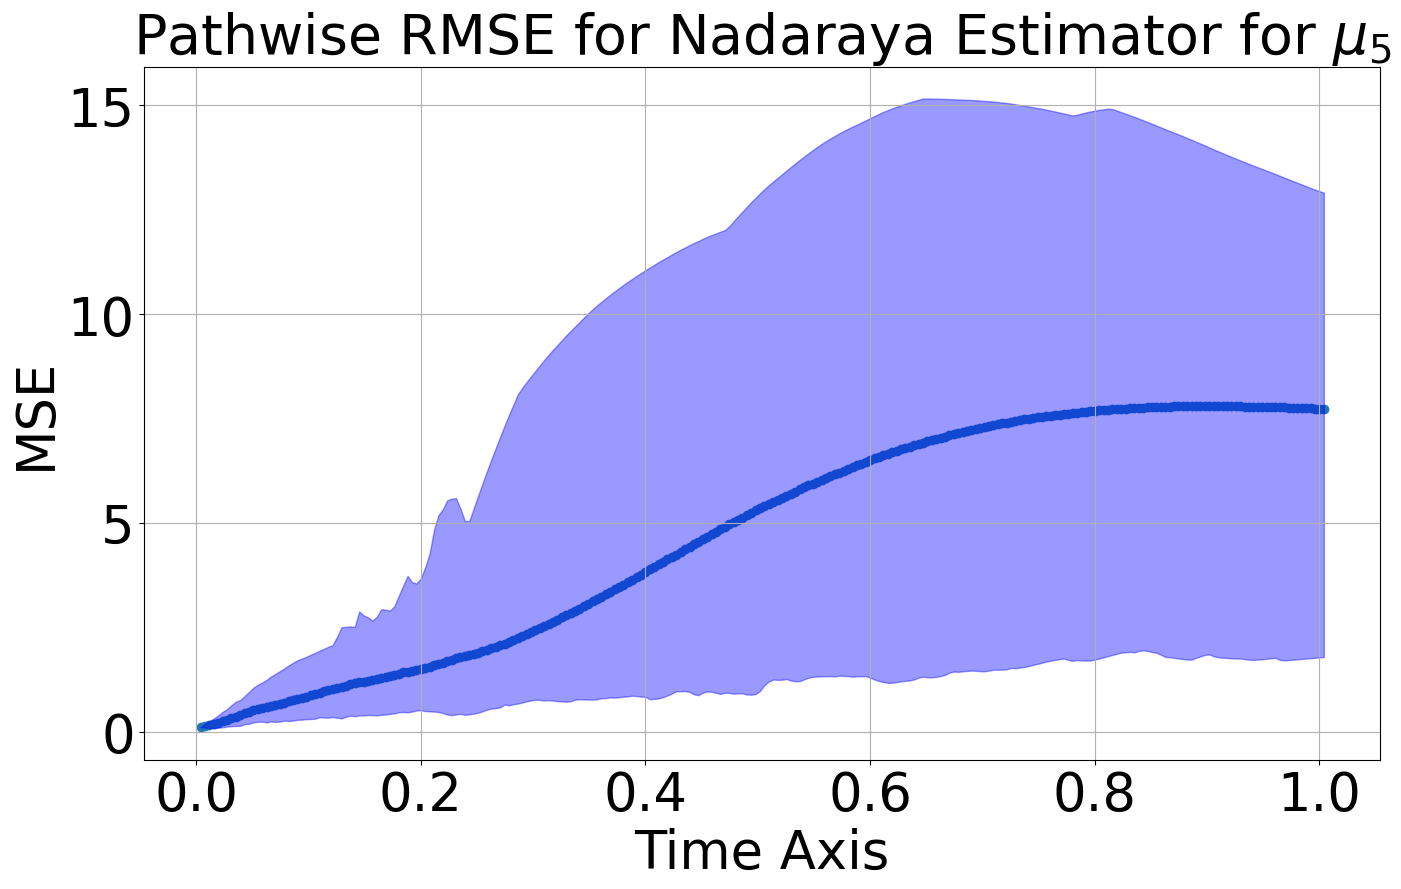

Final time cumulative MSE local-time error 7.724437609641813 with IQR ((1.7897288036485244, 12.906677994115155))at bw 0.0127401 for 0.75FConst

5.14518618173015 0.0168214 7.724437609641813


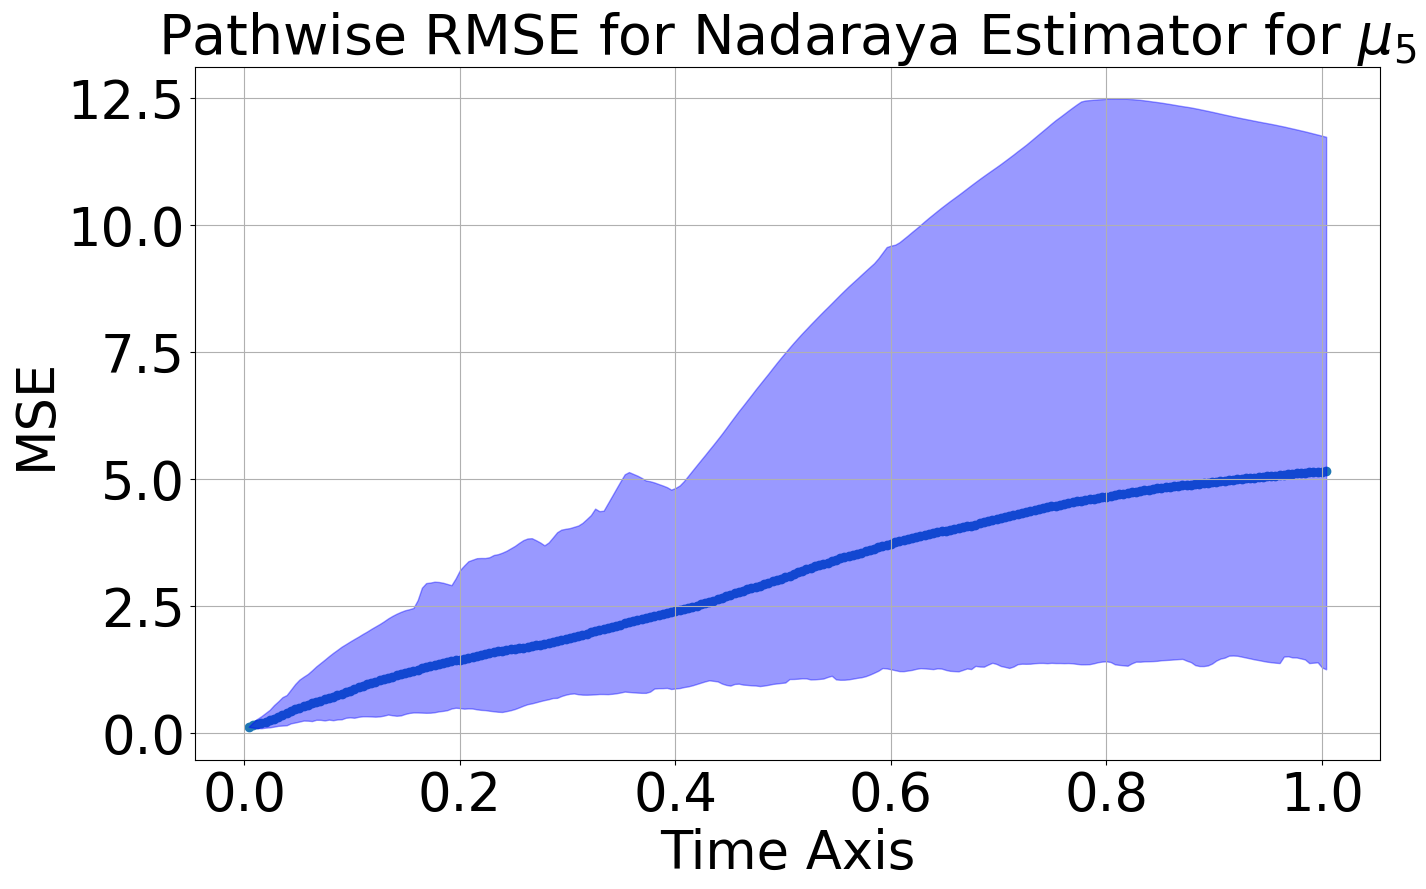

Final time cumulative MSE local-time error 5.14518618173015 with IQR ((1.2514618787337097, 11.731804001313584))at bw 0.0168214 for 0.75FConst

3.6801807991002553 0.0222102 5.14518618173015


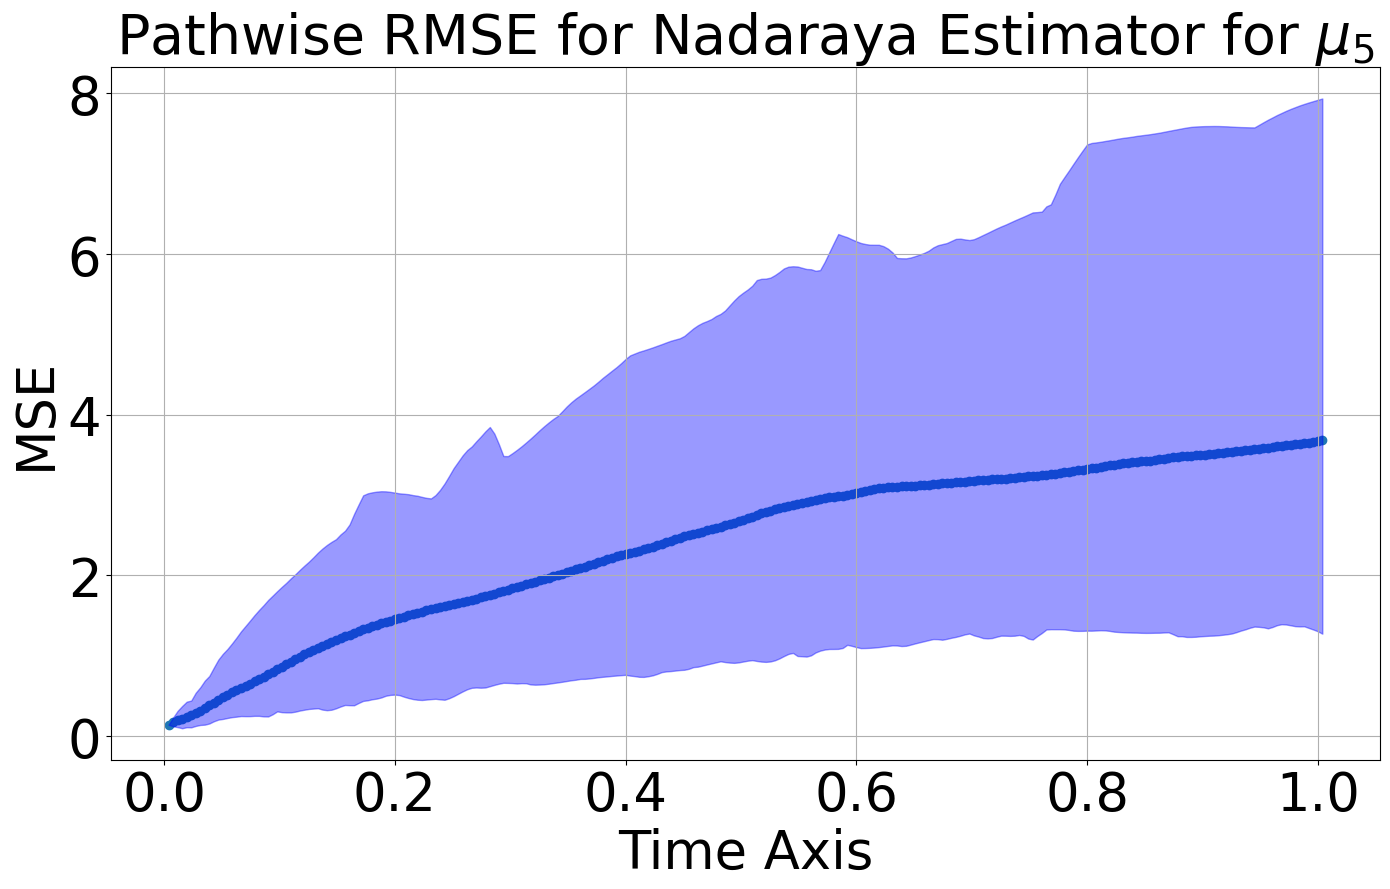

Final time cumulative MSE local-time error 3.6801807991002553 with IQR ((1.2750429154232803, 7.935546374445746))at bw 0.0222102 for 0.75FConst

3.3472446037270394 0.0293252 3.6801807991002553


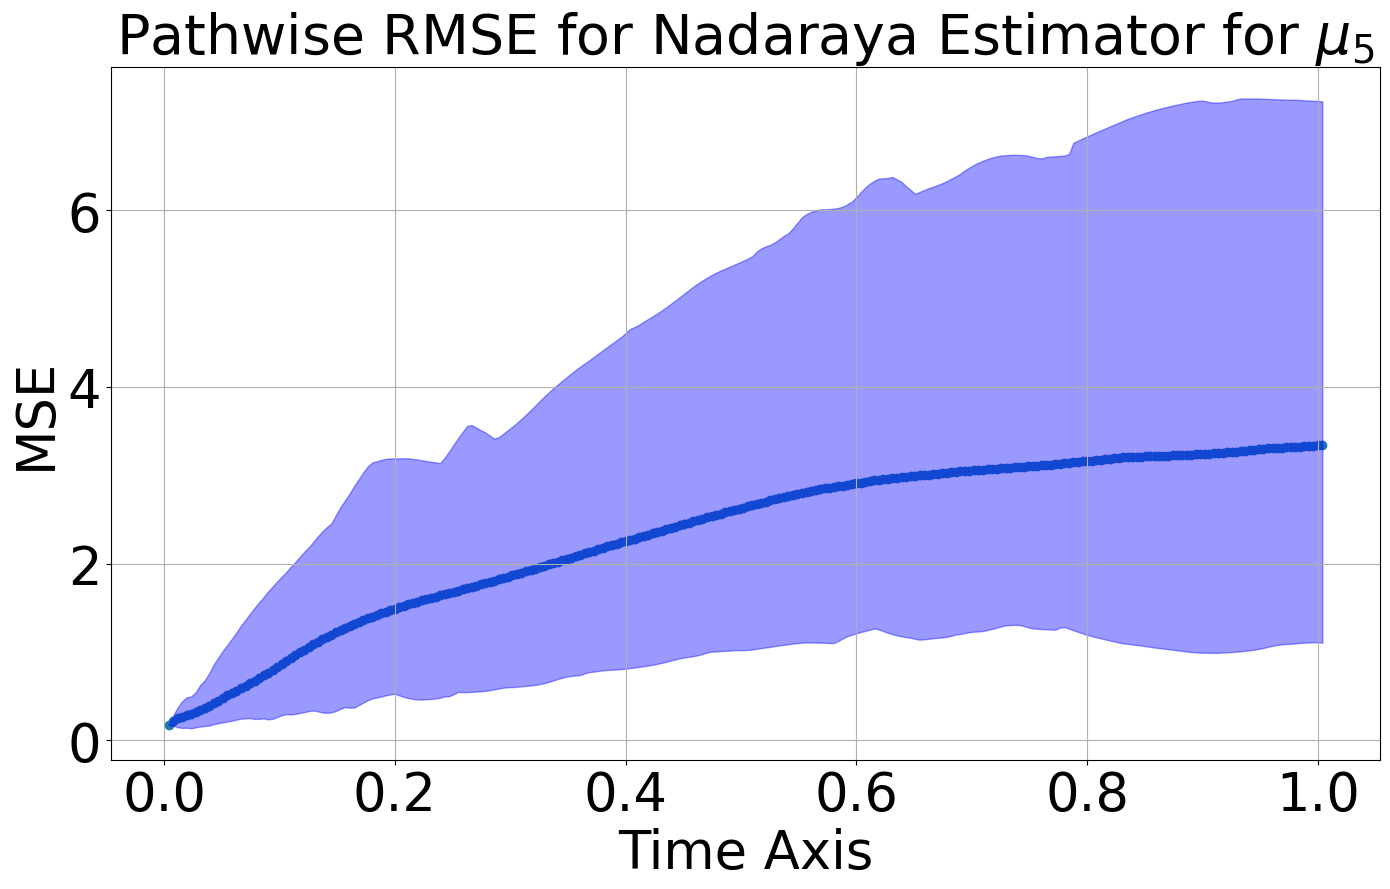

Final time cumulative MSE local-time error 3.3472446037270394 with IQR ((1.1058012485232984, 7.233571923332574))at bw 0.0293252 for 0.75FConst

3.258309950088731 0.0387196 3.3472446037270394


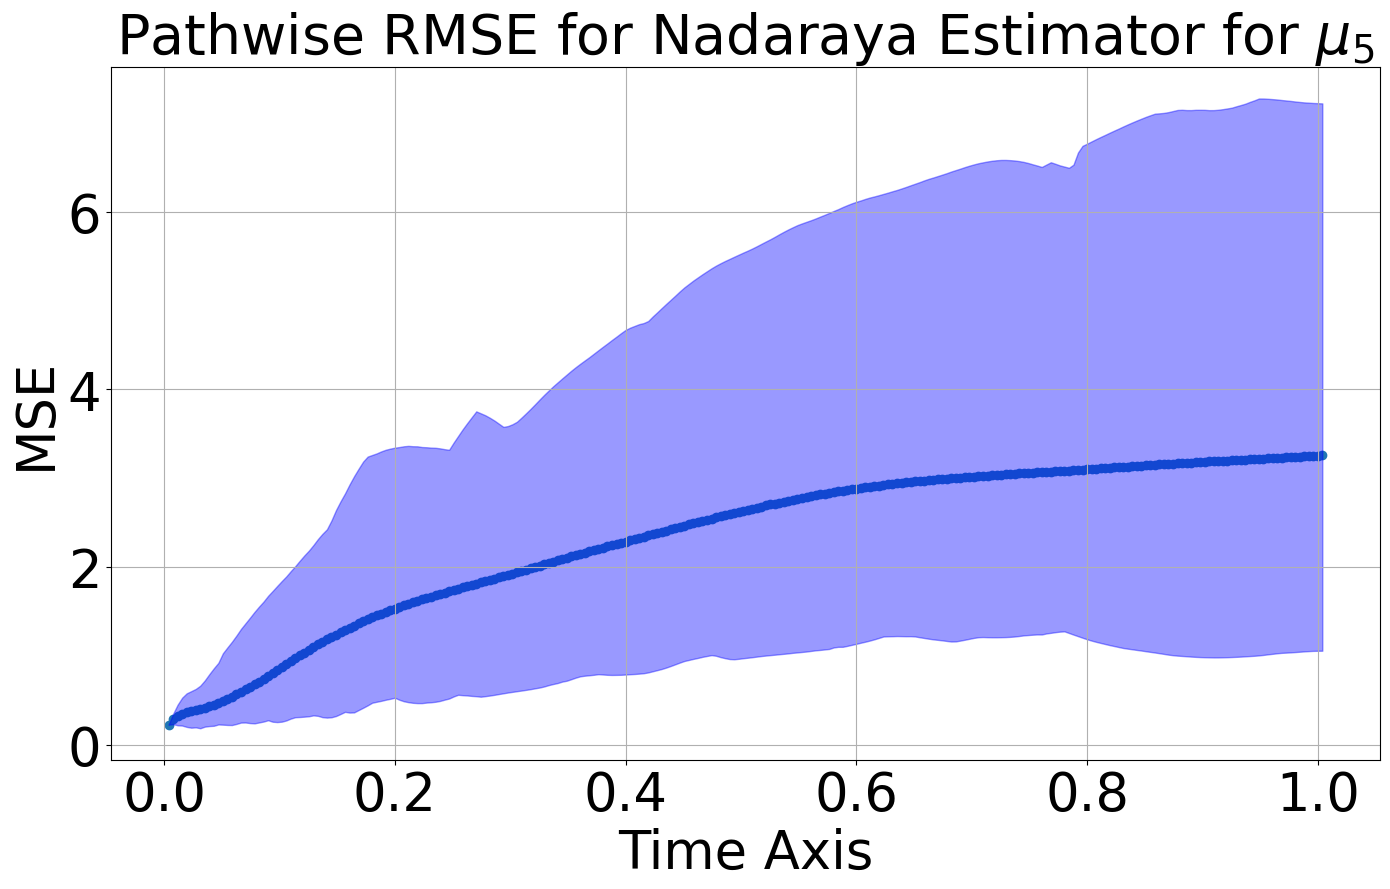

Final time cumulative MSE local-time error 3.258309950088731 with IQR ((1.056435938588265, 7.219687267198731))at bw 0.0387196 for 0.75FConst

3.201037981872417 0.0511235 3.258309950088731


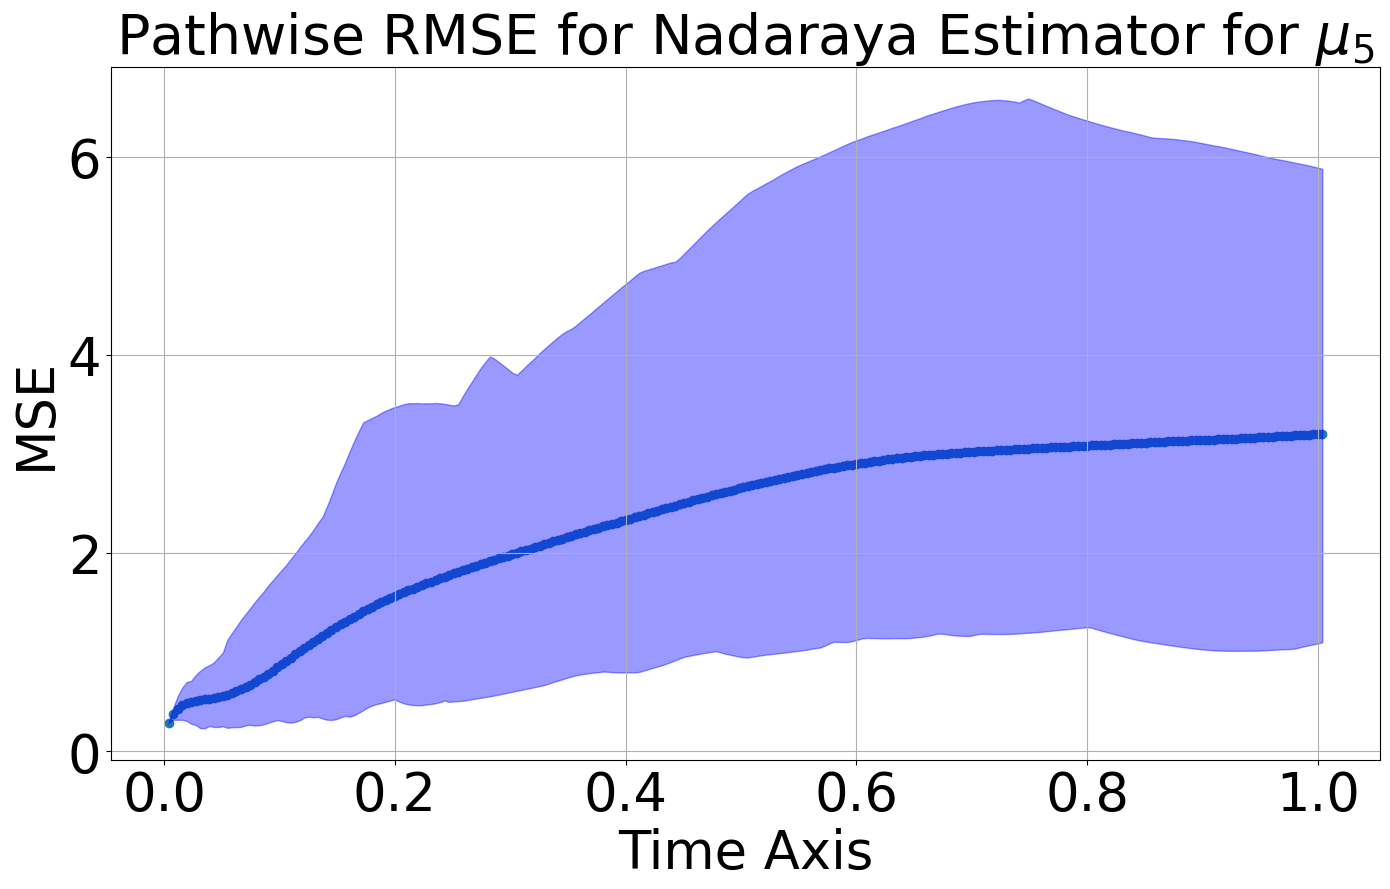

Final time cumulative MSE local-time error 3.201037981872417 with IQR ((1.0978769734354326, 5.87646209965805))at bw 0.0511235 for 0.75FConst

3.262406385759222 0.067501 3.201037981872417
3.3404826996610577 0.0891251 3.201037981872417


In [10]:
curr_rmse = np.inf
toSave = True
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_5$",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/12DLnzLessData/IIDNadaraya_{config.ndims}DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")

In [11]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=False)
data

{'progress_name': 'idx',
 'span_units': 17.0,
 'wall_clock_h_total': 8.07708027223746,
 'wall_clock_per_unit_h': 0.4751223689551447,
 'cpu_avg_pct': 1.573360655737708,
 'cpu_peak_pct': 1.6,
 'ram_avg_gib': 118.14425595081961,
 'ram_peak_gib': 124.460532,
 'gpu_util_avg_pct': None,
 'gpu_util_peak_pct': None,
 'gpu_mem_avg_gib': None,
 'gpu_mem_peak_gib': None}